In [1]:
# python imports
from math import pi
import json
import os

# third-party imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
files = list()

for file in os.listdir('../output/'):
    if file.endswith('.json'):
        files.append(file)

In [3]:
with open(f'../output/{files[-1]}') as file:
    iterations = json.load(file)['iterations']

In [4]:
def normalize(target, linespace):
    for index, value in enumerate(linespace[:-1]):
        if value < target <= linespace[index + 1]:
            return index + 1

In [5]:
def get_normalized_values(df, linespaces):
    result = {}
    for key, value in df.items():
        result.setdefault(key, normalize(value, linespaces[key]))
    return result

In [6]:
def print_graph(iterations, linespaces, key):
    cvss = get_normalized_values(iterations[key]['stats_cvss'], linespaces)
    frape = get_normalized_values(iterations[key]['stats_frape'], linespaces)
    
    cvss = list(cvss.values())
    cvss = [*cvss, cvss[0]]
    
    frape = list(frape.values())
    frape = [*frape, frape[0]]
    
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(cvss))

    plt.figure(figsize=(5, 5))
    
    ax = plt.subplot(polar=True)
    ax.set_rlim(0, 6)
    
    plt.plot(label_loc, cvss, label='cvss')
    plt.plot(label_loc, frape, label='frape')
    
    plt.title(f'Risk Comparison - {key}th iteration', size=20, y=1.05)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
    
    plt.legend()
    plt.show()

In [7]:
linespaces = dict()
categories = list()

initial = iterations['0']['stats_cvss']
n_edges = len(list(initial.keys()))

for key, value in initial.items():
    linespaces.setdefault(key, np.linspace(0, value, n_edges + 1))

categories = list(linespaces.keys())
categories = [*categories, categories[0]]

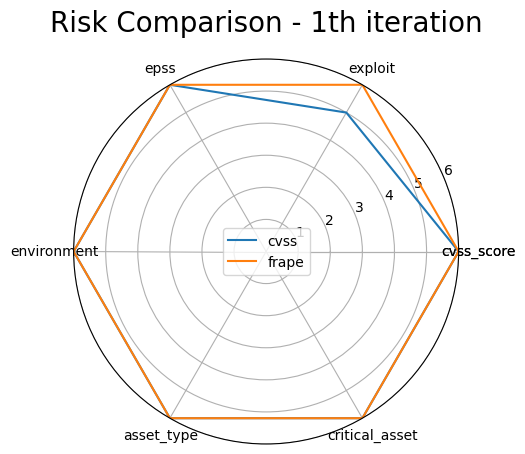

In [8]:
print_graph(iterations, linespaces, '1')

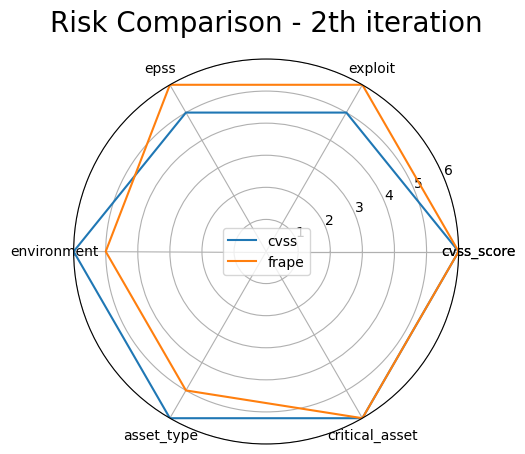

In [9]:
print_graph(iterations, linespaces, '2')

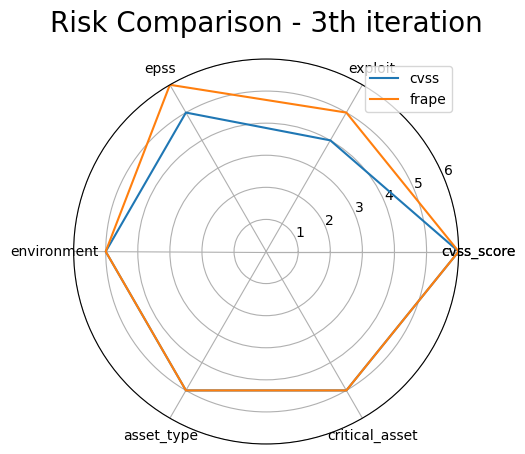

In [10]:
print_graph(iterations, linespaces, '3')

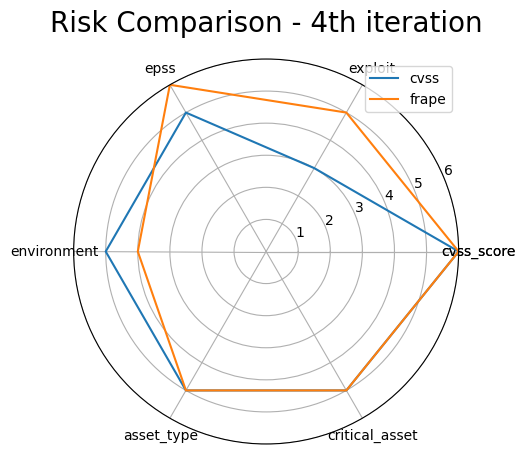

In [11]:
print_graph(iterations, linespaces, '4')

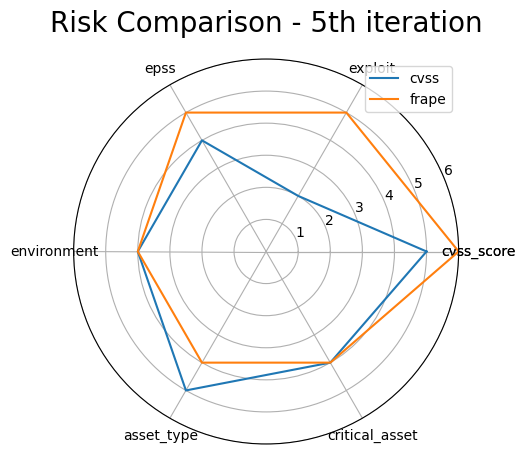

In [12]:
print_graph(iterations, linespaces, '5')

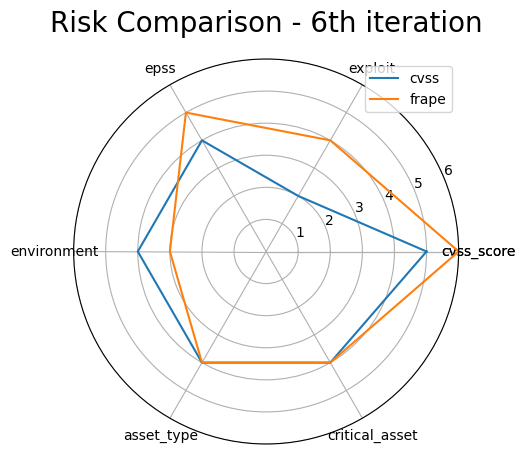

In [13]:
print_graph(iterations, linespaces, '6')

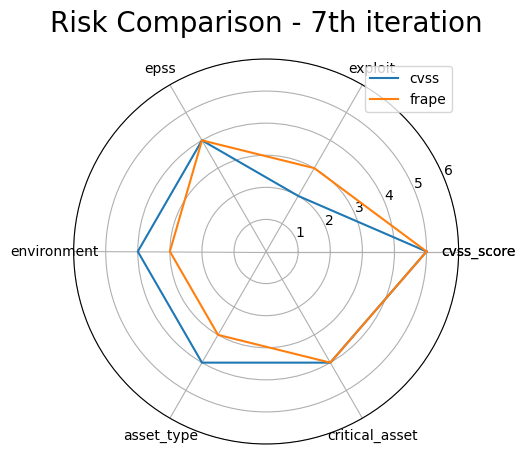

In [14]:
print_graph(iterations, linespaces, '7')